# Cross Validation

## Importing libraries

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('titanic_cleaned.csv')

In [3]:
#dimensions of the dataframe
df.shape

(891, 25)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,29.699118,8.4583,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
6,0,54.000000,51.8625,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
7,0,2.000000,21.0750,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8,1,27.000000,11.1333,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9,1,14.000000,30.0708,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [5]:
#Data types of the all columns of the dataframe
df.dtypes

Survived        int64
Age           float64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [6]:
#Checking for a missing values
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Segragating Variables : Independent and Dependent variables

In [7]:
#Seperating Independent and Dependent variables
X = df.drop('Survived', axis=1)
y = df['Survived']

## Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
#View first 10 rows after scaling
X.head(10)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
1,0.638789,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,2.074505,-0.307562,-1.623803
2,-0.284663,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
3,0.407926,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
4,0.407926,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
5,0.000000,-0.478116,-0.565685,-0.510152,0.902587,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,3.251373,-1.623803
6,1.870059,0.395814,1.767767,-0.510152,-1.107926,-0.737695,0.737695,0.682247,-0.553581,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
7,-2.131568,-0.224083,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-1.465746,-0.553581,-0.180125,...,-1.784124,2.559462,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
8,-0.207709,-0.424256,-0.565685,-0.510152,0.902587,1.355574,-1.355574,0.682247,-0.553581,-0.180125,...,-1.784124,-0.390707,3.183944,-0.075122,-0.067153,-0.075122,-0.03352,-0.482043,-0.307562,0.615838
9,-1.208115,-0.042956,-0.565685,1.960202,-1.107926,1.355574,-1.355574,-1.465746,1.806421,-0.180125,...,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,2.074505,-0.307562,-1.623803


## Splitting the dataset into Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Implementing KNN

In [11]:
#Importing KNN 
from sklearn.neighbors import KNeighborsClassifier as KNN

## Checking consistency of the model using cross validation

In [12]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNN(n_neighbors = 3), X = X_train, y = y_train, cv = 10)
score

array([0.79166667, 0.76388889, 0.8028169 , 0.76056338, 0.8028169 ,
       0.81690141, 0.85915493, 0.76056338, 0.73239437, 0.83098592])

In [13]:
#Consistency using Mean and Standard Deviation in percentage format
score.mean()*100, score.std()*100

(79.21752738654148, 3.6336165452292186)

## Automating the process of cross validation for different K-Neighbors

In [14]:
def val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
    
    for i in n_neighbors:
        
        #10 fold cross validation for every value of n_neighbor
        score = cross_val_score(KNN(n_neighbors= i), X = X_train, y = y_train, cv = 10)
        
        #Adding mean to avg list
        avg.append(score.mean())
        
        #Adding standard deviation to std list
        std.append(score.std())
        
    return avg, std

In [15]:
n_neighbors = range(1, 50)
mean, std = val_score(n_neighbors)

## Plotting Mean Validation Score each K value

Text(0.5, 1.0, 'Mean Validation Score')

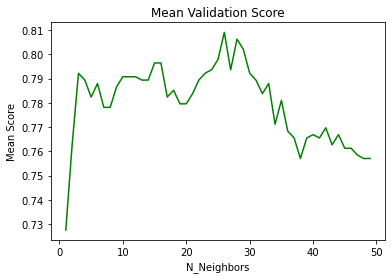

In [16]:
plt.plot(n_neighbors, mean, color='green', label='Mean')
plt.xlabel('N_Neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Mean Validation Score')

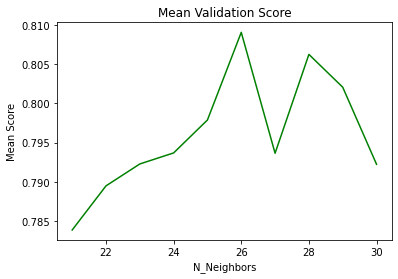

In [17]:
#Let's plot above graph for k=20 to k=30
plt.plot(n_neighbors[20:30], mean[20:30], color='green', label='Mean')
plt.xlabel('N_Neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation Score')

**We can see that for k=26 it gives the maximum score.**

## Plotting Standard Deviation Validation Score for each value of K values between 20 to 30

Text(0.5, 1.0, 'Standard Deviation of Validation Score')

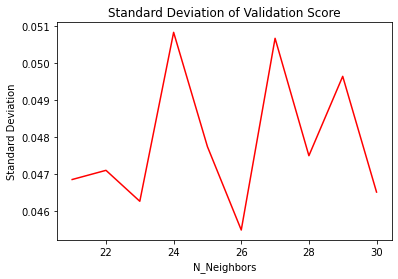

In [18]:
plt.plot(n_neighbors[20:30], std[20:30], color='red', label='Standard Deviation')
plt.xlabel('N_Neighbors')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Validation Score')

We can see that for k=26, the standard deviation is low, Which is good for out model.

## Trying the optimal model over Test set

In [19]:
knn = KNN(n_neighbors=26)
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("Train Score : ", train_score)
print("Test Score : ", test_score)

Train Score :  0.8146067415730337
Test Score :  0.7821229050279329
